Note: Exercise taken from the Andrés Felipe Rojas Parra Github user arojaspa76  
https://github.com/arojaspa76/AI-Fundamentals-Bootcamp

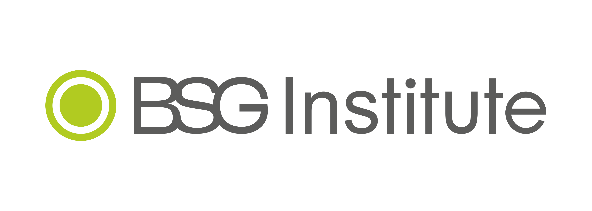


### Project Description
A description of the project that you would like to give

### Project Objective
In your own words

### Data Source Description
Decribe the datasource(s) used in this template


## **<center>Scoring Guidelines - Module II</center>**

### **Phase 1. Data Summary: 10% - 1 point** <br>
- In this phase, you must import all the necessary libraries for working with data (e.g., pandas, numpy, nltk, etc.) and load the Titanic dataset into a pandas DataFrame. Ensure the data loads correctly and perform an initial visualization (e.g., display the first rows using head() or verify the dimensions).<br>

### **Phase 2. EDA (Univariate and Multivariate Analysis) and Understanding Columns Data Processing: 30% - 3 points** <br>
- Explore the dataset to understand its structure and content. Analyze the distributions of the dataset variables. This phase helps you understand the data and prepare a strategy to process and use it in predictive analysis. <br>

### **Phase 3. Data Preprocessing: 40% - 4 points** <br>
- Clean and transform the selected text columns. This step transforms the text data into useful information that machine learning algorithms can process. <br>

### **Phase 4. Conclusion: 10% - 1 points**<br>
- Summary of the understanding of the application of various preprocessing, vectorization, and model performance on the dataset. This conclusion should contain key points from the data scientist's perspective to the user/client who needs to make a decision based on the analysis being performed. <br>

### **Phase 5. Notebook Presentation: 10% - 10 points** <br>
- Notebook structure and flow
- Well-commented code

### Each phase should contain its respective observations, as these will be part of the evaluation.

# **Phase 1. Data Summary: 10% - 1 point**

## Import the libraries needed to develop the Notebook

In [ ]:
# Tratamiento de datos
#######################################
import numpy as np
import pandas as pd

# Graficos
#######################################
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

# Configuracion matplotlib
#######################################
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# to display values upto 2 decimal places
pd.set_option("display.float_format", lambda x: "%.2f" % x)
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Instruction from https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.set_theme(style="darkgrid")

## Data loading and descriptive analysis.

In [ ]:
titanic_df = pd.read_csv("../fuentes/2.Titanic-Dataset.csv")

In [ ]:
titanic_df.head()

In [ ]:
titanic_df.tail()

In [ ]:
titanic_df.shape

In [ ]:
titanic_df.info()

## Dataset summary

In [ ]:
# Description of numeric columns
titanic_df.describe().T

In [ ]:
# Descriptive analysis of all columns in the dataset
titanic_df.describe(include='all').T

## Searching for unique values for all variables

In [ ]:
titanic_df.agg(['nunique']).T

## Checking how many NaN or null values are present in each variable.

In [ ]:
titanic_df.isnull().sum()

In [ ]:
titanic_df.Cabin.value_counts()

In [ ]:
titanic_df.Embarked.value_counts()

In [ ]:
# parsing all columns of all data types
columnas = [col for col in titanic_df.columns]

In [ ]:
for col in columnas:
    print("\n", titanic_df[col].value_counts(),"\n")

In [ ]:
# parsing columns of data type 'object'
columnas_object = [col for col in titanic_df.columns if titanic_df[col].dtype == 'object']

In [ ]:
for col in columnas_object:
    print("\n", titanic_df[col].value_counts(),"\n")

## Determining if there are duplicate records

In [ ]:
titanic_df.duplicated().sum()

## Determining the standard deviation of columns in the dataset

In [ ]:
# parsing columns of data type 'object'
columnas_numericos = [col for col in titanic_df.columns if titanic_df[col].dtype != 'object']

In [ ]:
for col in columnas_numericos:
    print("\n",col,": ",titanic_df[col].skew().sum(),"\n")

## Information counting if you do not want to do it completely for all columns

In [ ]:
titanic_df.Sex.value_counts(normalize=True)

In [ ]:
col_sex_conteo = titanic_df.Sex.value_counts(normalize=True)

In [ ]:
col_sex_conteo *= 100

In [ ]:
plt.Figure(figsize=(12,8))
sns.barplot(x=col_sex_conteo.index,y=col_sex_conteo.values,palette='viridis')
plt.title('Contedo de la columna SEX')
plt.xlabel('Genero')
plt.ylabel('Procentaje')
plt.show()

In [ ]:
titanic_df.Survived.value_counts(normalize=True)

In [ ]:
col_sobreviviente_conteo_sin_normalizar = titanic_df.Survived.value_counts()
col_sobreviviente_conteo_normalizado = titanic_df.Survived.value_counts(normalize=True)

In [ ]:
col_sobreviviente_conteo_normalizado *= 100

In [ ]:
plt.Figure(figsize=(12,8))
sns.barplot(x=col_sobreviviente_conteo_sin_normalizar.index,y=col_sobreviviente_conteo_sin_normalizar.values,palette='viridis')
plt.title('Conteo de la columna Survived')
plt.xlabel('Genero')
plt.ylabel('Total')
plt.show()

In [ ]:
plt.Figure(figsize=(12,8))
sns.barplot(x=col_sobreviviente_conteo_normalizado.index,y=col_sobreviviente_conteo_normalizado.values,palette='viridis')
plt.title('Datos normalizados de la columna Survived')
plt.xlabel('Genero')
plt.ylabel('Porcentaje')
plt.show()

# **Phase 2. EDA (Univariate and Multivariate Analysis) and Understanding Columns Data Processing: 30% - 3 points**

*Calculating the interquartile range (Q3 (75%) - Q1 (25%))*

IQR = Q3 - Q1

The line called the median allows me to have equal shares of the data in the dataset.

Calculating the lower and upper limits of the boxplot graph
- Lower limit = Q1 - 1.5 x IQR
- Upper limit = Q3 + 1.5 x IQR

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise"
    )  # boxplot will be created and a star will indicate the mean value of the column

    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple"
        )
    else:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple"
        )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

## Analyzing the Fare Column

In [ ]:
histogram_boxplot(titanic_df,"Fare", kde=True)

## Analyzing the Age Column

In [ ]:
histogram_boxplot(titanic_df,"Age", kde=True)

## Definition of the function that allows me to generate bar charts with labels

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
labeled_barplot(titanic_df,"Survived", perc=True)

In [ ]:
labeled_barplot(titanic_df,"Pclass", perc=True)

In [ ]:
labeled_barplot(titanic_df,"Sex", perc=True)

# **Phase 3. Data Preprocessing: 40% - 4 points**

In [ ]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

In [ ]:
# Descripcion de columnas numericas
titanic_df.describe().T

In [ ]:
# Analisis desciptivo de todas las columnas del dataset
titanic_df.describe(include='all').T

In [ ]:
# Analisis desciptivo de todas las columnas del dataset
titanic_df.head()

In [ ]:
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
titanic_df.head()